# Estatística descritiva univariada

## Medidas-resumo usuais em estatística descritiva univariada

### Medidas de dispersão ou variabilidade

Duas ou mais distribuições podem possuir as mesmas medidas de posição e serem completamente diferentes, pois os seus elementos podem estar mais ou menos dispersos, ou seja, ao escolher uma medida de posição para representar a distribuição, a sua variabilidade fica oculta. A dispersão é a tendência dos dados de se espalharem em torno de uma medida de posição, geralmente a média, ou seja, o quanto um conjunto de dados é homogêneo ou heterogêneo. As medidas mais comuns de dispersão são:

- dispersão absoluta: amplitude, desvio médio, variância e desvio-padrão
- dispersão relativa: variância relativa e coeficiente de variação

In [1]:
# exemplo simples
import pandas as pd

exemplo = {
    "x": [70, 70, 70, 70, 70],
    "y": [68, 69, 70, 71, 72],
    "z": [5, 15, 50, 120, 160],
}

df_exemplo_dispersao = pd.DataFrame(exemplo)

df_exemplo_dispersao

,x,y,z
0,70,68,5
1,70,69,15
2,70,70,50
3,70,71,120
4,70,72,160


In [2]:
df_exemplo_dispersao.describe()

,x,y,z
count,5.0,5.000000,5.00000
mean,70.0,70.000000,70.00000
std,0.0,1.581139,67.54628
min,70.0,68.000000,5.00000
25%,70.0,69.000000,15.00000
50%,70.0,70.000000,50.00000
75%,70.0,71.000000,120.00000
max,70.0,72.000000,160.00000


A medida mais simples é a amplitude total, que é a diferença entre o maior e o menor valor do conjunto de dados. A amplitude total é uma medida de dispersão que é sensível a valores extremos, pois é calculada a partir de apenas dois valores.

$$
A = X_{max} - X_{min}
$$

In [6]:
df_exemplo_dispersao.max() - df_exemplo_dispersao.min()

x      0
y      4
z    155
dtype: int64

O desvio é a diferença entre cada valor observado e a média da variável. Assim, para dados populacionais, seria representado por $X_i - \mu$, e para dados amostrais, por $X_i - \bar{X}$. O desvio médio, ou desvio-médio absoluto, é a média dos desvios, ou seja, a média aritmética dos valores absolutos dos desvios.

Para dados não agrupados, o desvio médio é calculado pela fórmula:

$$
D_m = \frac{\sum\limits_{i=1}^{n} |X_i - \bar{X}|}{n} \quad \text{(para amostras)}
$$
$$
D_m = \frac{\sum\limits_{i=1}^{N} |X_i - \mu|}{N} \quad \text{(para populações)}
$$

In [7]:
pd.__version__

'2.3.3'

In [8]:
df_exemplo_dispersao - df_exemplo_dispersao.mean()

,x,y,z
0,0.0,-2.0,-65.0
1,0.0,-1.0,-55.0
2,0.0,0.0,-20.0
3,0.0,1.0,50.0
4,0.0,2.0,90.0


In [9]:
(df_exemplo_dispersao - df_exemplo_dispersao.mean()).abs()

,x,y,z
0,0.0,2.0,65.0
1,0.0,1.0,55.0
2,0.0,0.0,20.0
3,0.0,1.0,50.0
4,0.0,2.0,90.0


In [10]:
(df_exemplo_dispersao - df_exemplo_dispersao.mean()).abs().mean()

x     0.0
y     1.2
z    56.0
dtype: float64

A variância é uma medida de dispersão que avalia o quanto os dados estão dispersos em relação à média aritmética. Em vez de considerar a média dos desvios absolutos, a variância considera a média dos desvios ao quadrado.

Para dados não agrupados, a variância é calculada pela fórmula:

$$
S^2 = \frac{\sum\limits_{i=1}^{n} (X_i - \bar{X})^2}{n-1} \quad \text{(para amostras)}
$$
$$
\sigma^2 = \frac{\sum\limits_{i=1}^{N} (X_i - \mu)^2}{N} \quad \text{(para populações)}
$$

A relação entre a variância amostal e populacional é dada por:

$$
S^2 = \frac{N}{n-1} \sigma^2
$$

In [12]:
df_exemplo_dispersao.var()

x       0.0
y       2.5
z    4562.5
dtype: float64

Como a variância considera os desvios ao quadrado, a unidade de medida da variância é o quadrado da unidade de medida da variável original e seu valor tende a ser muito grande e de difícil interpretação. Para obter uma medida de dispersão na mesma unidade de medida dos dados, é necessário calcular a raiz quadrada da variância, obtendo-se o desvio-padrão.

O desvio-padrão é calculado pela fórmula:

$$
S = \sqrt{S^2} \quad \text{(para amostras)}
$$
$$
\sigma = \sqrt{\sigma^2} \quad \text{(para populações)}
$$

In [13]:
df_exemplo_dispersao.std()

x     0.000000
y     1.581139
z    67.546280
dtype: float64

In [14]:
import numpy as np

np.sqrt(4562.5)

np.float64(67.54628043053148)

In [15]:
df_exemplo_dispersao.describe()

,x,y,z
count,5.0,5.000000,5.00000
mean,70.0,70.000000,70.00000
std,0.0,1.581139,67.54628
min,70.0,68.000000,5.00000
25%,70.0,69.000000,15.00000
50%,70.0,70.000000,50.00000
75%,70.0,71.000000,120.00000
max,70.0,72.000000,160.00000


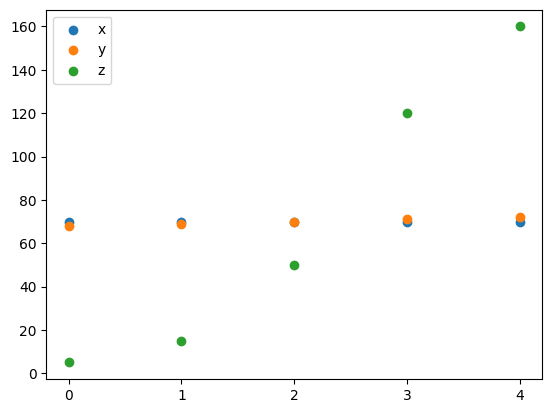

In [18]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots()

ax.scatter(df_exemplo_dispersao.index, df_exemplo_dispersao['x'],label='x')
ax.scatter(df_exemplo_dispersao.index, df_exemplo_dispersao['y'],label='y')
ax.scatter(df_exemplo_dispersao.index, df_exemplo_dispersao['z'],label='z')

ax.xaxis.set_major_locator(mtick.MaxNLocator(integer=True))

ax.legend()
plt.show()

O coeficiente de variação é uma medida de dispersão relativa que expressa a variabilidade dos dados em relação à média. O coeficiente de variação é uma medida adimensional, ou seja, não possui unidade de medida. Quanto menor for o seu valor, mais homogêneo é o conjunto de dados.

O coeficiente de variação é calculado pela fórmula:

$$
CV = \frac{S}{\bar{X}} \times 100 \quad \text{(para amostras)}
$$
$$
CV = \frac{\sigma}{\mu} \times 100 \quad \text{(para populações)}
$$

In [19]:
df_exemplo_dispersao.std()/df_exemplo_dispersao.mean() * 100

x     0.000000
y     2.258770
z    96.494686
dtype: float64

In [20]:
df_cenouras.describe()

,carrots
count,20.000000
mean,45.300000
std,0.700376
min,44.000000
25%,44.875000
50%,45.000000
75%,45.850000
max,46.500000


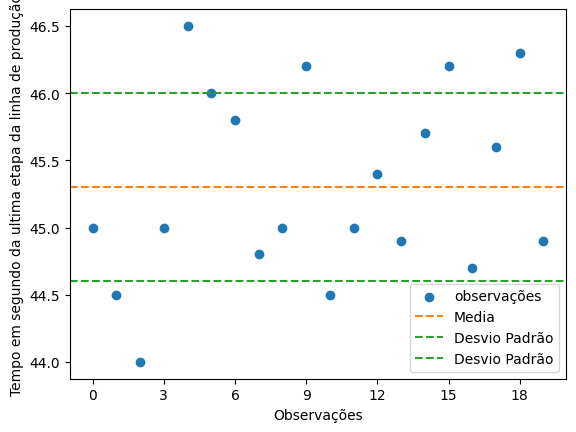

In [29]:
fig, ax = plt.subplots()



ax.scatter(df_cenouras.index, df_cenouras['carrots'],label='observações')

ax.axhline(df_cenouras['carrots'].mean(),color="C1", linestyle='--',label='Media')

ax.axhline(df_cenouras['carrots'].mean()+ df_cenouras['carrots'].std(),color='C2',linestyle='--',label='Desvio Padrão')

ax.axhline(df_cenouras['carrots'].mean()-df_cenouras['carrots'].std(),color='C2',linestyle='--',label='Desvio Padrão')


ax.xaxis.set_major_locator(mtick.MaxNLocator(integer=True))

ax.set_ylabel("Tempo em segundo da ultima etapa da linha de produção")
ax.set_xlabel("Observações")

ax.legend()
plt.show()

In [30]:
df_notas.describe()

,grades
count,30.000000
mean,5.686667
std,1.318498
min,3.500000
25%,4.700000
50%,5.500000
75%,6.575000
max,8.800000


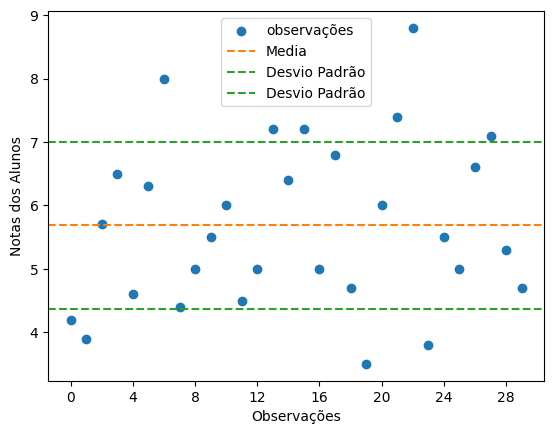

In [33]:
fig, ax = plt.subplots()



ax.scatter(df_notas.index, df_notas['grades'],label='observações')
ax.axhline(df_notas['grades'].mean(),color="C1", linestyle='--',label='Media')
ax.axhline(df_notas['grades'].mean()+ df_notas['grades'].std(),color='C2',linestyle='--',label='Desvio Padrão')
ax.axhline(df_notas['grades'].mean()-df_notas['grades'].std(),color='C2',linestyle='--',label='Desvio Padrão')


ax.xaxis.set_major_locator(mtick.MaxNLocator(integer=True))

ax.set_ylabel("Notas dos Alunos")
ax.set_xlabel("Observações")

ax.legend()
plt.show()

In [3]:
DADOS = "./dados/carrots.csv"

df_cenouras = pd.read_csv(DADOS)

df_cenouras.head()

,carrots
0,45.0
1,44.5
2,44.0
3,45.0
4,46.5


In [4]:
DADOS = "./dados/grades.csv"

df_notas = pd.read_csv(DADOS)

df_notas.head()

,grades
0,4.2
1,3.9
2,5.7
3,6.5
4,4.6
